# Credit card fraud detection using XGBOOST And Imbalance data

🔥 Step 1: Don’t Use Accuracy

With this imbalance, a model predicting only 0 would be ~99.8% accurate — but useless.

Use instead:

✅ Precision

✅ Recall

✅ F1-score

✅ ROC-AUC

✅ PR-AUC (very important for imbalance)

from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from  sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split , cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

print("All libraries import succesfully ! ")

All libraries import succesfully ! 


In [2]:
df=pd.read_csv("creditcard.csv")
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# data is imbalance 
Class
0    284315
1       492

its possible to will high accuracy but model dont good train on fraud because its not balance data therefore we will face bias problem . and our main focus is fraud but model dont good train on  fraud data

In [7]:
df.drop(columns=["Time"],inplace=True)

In [8]:
df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [10]:
X=df.iloc[:,:-1]
y=df["Class"]

In [11]:
s=StandardScaler()
scale=s.fit_transform(X)

In [12]:
X=pd.DataFrame(scale,columns=X.columns)

In [14]:
X.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475


In [15]:
X_train,X_test,y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
X_train.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,0.998136,-0.230595,-0.207758,0.233183,-0.369046,-0.064700,-0.507624,0.030137,0.959887,-0.027957,...,-0.162649,0.324289,1.334304,0.085207,-0.460007,-0.086325,-0.449541,0.111905,-0.142827,-0.313289
165061,-0.204716,-0.379665,1.025778,-1.425115,-0.078079,0.126334,0.014517,-0.336266,0.036753,0.561249,...,-0.610140,-0.208959,0.581097,0.181664,-1.657891,-2.257331,0.750528,-0.917839,-0.438653,-0.169717


In [41]:
pd.set_option('display.max_columns', None)
X_train.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,0.998136,-0.230595,-0.207758,0.233183,-0.369046,-0.064700,-0.507624,0.030137,0.959887,-0.027957,0.612314,1.692851,1.261755,-0.264206,-0.362384,0.350644,-1.095967,0.777482,0.206362,-0.162649,0.324289,1.334304,0.085207,-0.460007,-0.086325,-0.449541,0.111905,-0.142827,-0.313289
165061,-0.204716,-0.379665,1.025778,-1.425115,-0.078079,0.126334,0.014517,-0.336266,0.036753,0.561249,-1.905603,-0.727179,1.065927,-1.244893,0.689439,-0.182737,-1.919669,2.513636,-2.079483,-0.610140,-0.208959,0.581097,0.181664,-1.657891,-2.257331,0.750528,-0.917839,-0.438653,-0.169717


In [22]:
scale_pos_weight = 284315 / 492
model = XGBClassifier(
    learning_rate=0.05,
    max_depth=6,
    n_estimators=800,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    eval_metric="auc",
    random_state=42,
    n_jobs=-1
)

In [17]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_auc_scores = cross_val_score(
    model,
    X,
    y,
    cv=skf,
    scoring="roc_auc",
    n_jobs=-1
)

print("\nROC-AUC per fold:", roc_auc_scores)
print("Mean ROC-AUC:", roc_auc_scores.mean())


ROC-AUC per fold: [0.98410409 0.97857779 0.99471286 0.96929749 0.98445835]
Mean ROC-AUC: 0.9822301155696461


In [23]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.83      0.89        98

    accuracy                           1.00     56962
   macro avg       0.98      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [29]:
y_proba = model.predict_proba(X_test)[:, 1]
from sklearn.metrics import average_precision_score

pr_auc = average_precision_score(y_test, y_proba)
print("PR-AUC:", pr_auc)


PR-AUC: 0.8962460162191613


📊 Before vs After scale_pos_weight
🔹 Before (without scale_pos_weight)

Precision (class 1): 0.99

Recall (class 1): 0.80

F1: 0.88

🔹 After (with scale_pos_weight ≈ 577)

Precision (class 1): 0.95

Recall (class 1): 0.83

F1: 0.89  
🎯 What Changed?
✅ Recall increased: 0.80 → 0.83

Model detects more fraud cases.

Out of 98 frauds:

Before: detected ~78

Now: detected ~81

So you caught ~3 more fraud cases ✅

In [30]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56860     4]
 [   17    81]]


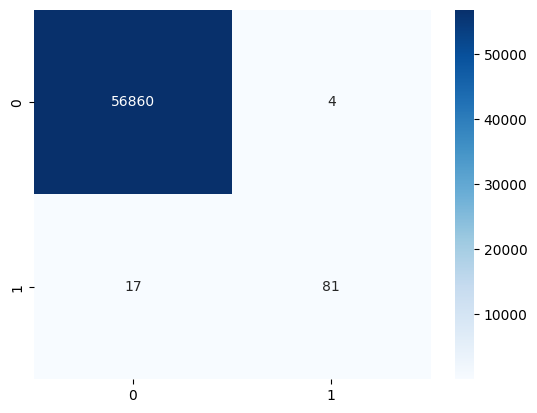

In [33]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.show()

# New prediction

In [40]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [42]:
new_data=pd.DataFrame([[0.998136,-0.230595,-0.207758,0.233183,-0.369046,-0.064700,-0.507624,0.030137,0.959887,-0.027957,0.612314,1.692851,1.261755,-0.264206,-0.362384,0.350644,-1.095967,0.777482,0.206362,-0.162649,0.324289,1.334304,0.085207,-0.460007,-0.086325,-0.449541,  0.111905,-  0.142827,-  0.313289]],columns=X_train.columns) 
new_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.998136,-0.230595,-0.207758,0.233183,-0.369046,-0.0647,-0.507624,0.030137,0.959887,-0.027957,0.612314,1.692851,1.261755,-0.264206,-0.362384,0.350644,-1.095967,0.777482,0.206362,-0.162649,0.324289,1.334304,0.085207,-0.460007,-0.086325,-0.449541,0.111905,-0.142827,-0.313289


In [43]:
scale1=s.transform(new_data)
new_data_df=pd.DataFrame(scale1,columns=X_train.columns)
new_data_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.509593,-0.139644,-0.137021,0.164693,-0.267377,-0.048564,-0.410337,0.025233,0.873713,-0.025676,0.59989,1.694207,1.267748,-0.275618,-0.395912,0.400164,-1.290382,0.927589,0.253504,-0.210979,0.441496,1.838643,0.136449,-0.759531,-0.165603,-0.93222,0.277245,-0.432701,-0.354482


In [44]:
prd=model.predict(new_data_df)
prd
if prd == 0:
    print("no fraud")
else:
    print("fraud detected")

no fraud
